In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from skimage.transform import radon
from tqdm import tqdm
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.decomposition import PCA
import sys
import cigsegy
sys.path.append('../')
from augmentation import *
import seaborn as sns
from utils import *
import seaborn as sns
from segysak.segy import segy_loader, segy_header_scan

In [3]:
path = "../../../data/bras/canal0501/"

In [4]:
n3,n2,n1 = 640,1280,1001

In [5]:
sx = np.fromfile(path+'sx.dat',dtype=np.float32).reshape(n3,n2,n1)
rgt = np.fromfile(path+'rgt.dat',dtype=np.float32).reshape(n3,n2,n1)
label = np.fromfile(path+'label.dat',dtype=np.float32).reshape(n3,n2,n1)
hor = np.fromfile(path+'hor.dat',dtype=np.float32).reshape(n3,n2)

In [45]:
sx_hor = np.zeros_like(hor)
for i in range(hor.shape[0]):
    for j in range(hor.shape[1]):
        sx_hor[i,j] = sx[i,j,round(hor[i,j])+40]

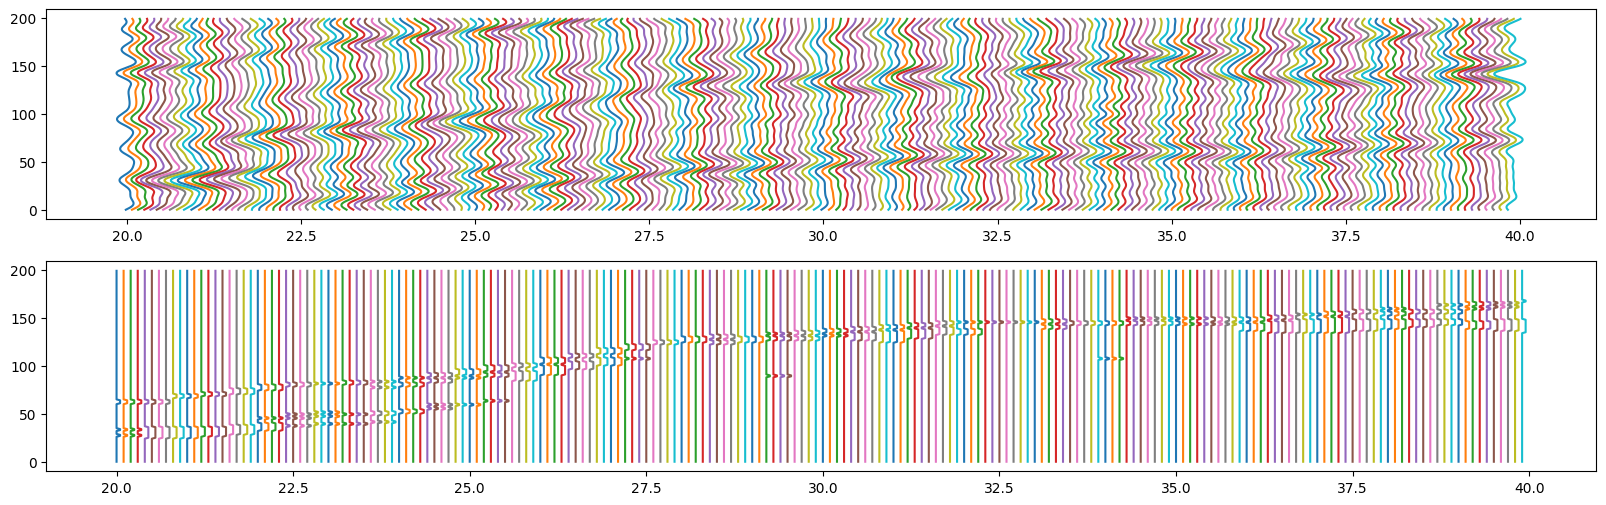

In [17]:
plt.figure(figsize=(20,6))
inline = 400
xl,xr = 200,400
d = 1
c = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.subplot(211)
for i in range(xl,xr,d):
    plt.plot(sx[inline,i,100:300]/2+i/10,np.arange(200))
plt.subplot(212)
for i in range(xl,xr,d):
    plt.plot(label[inline,i,100:300]/20+i/10,np.arange(200))

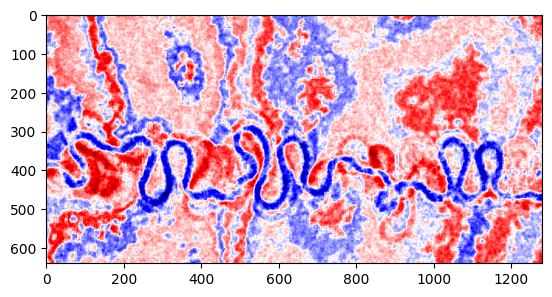

In [46]:
plt.imshow(sx_hor,cmap='seismic')

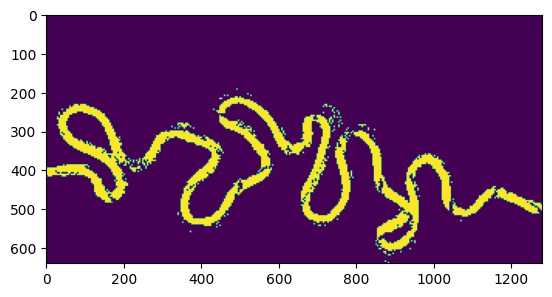

In [37]:
plt.imshow(sx_hor)

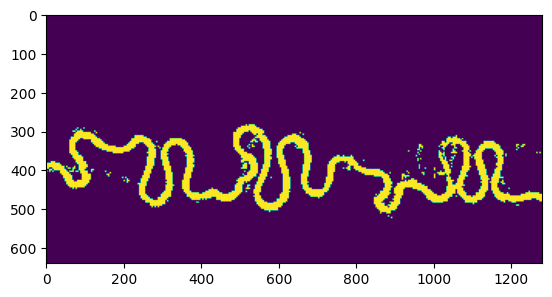

In [39]:
plt.imshow(sx_hor)

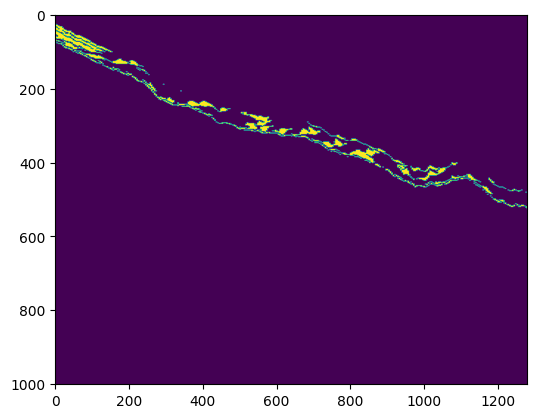

In [5]:
plt.imshow(label[400].T)

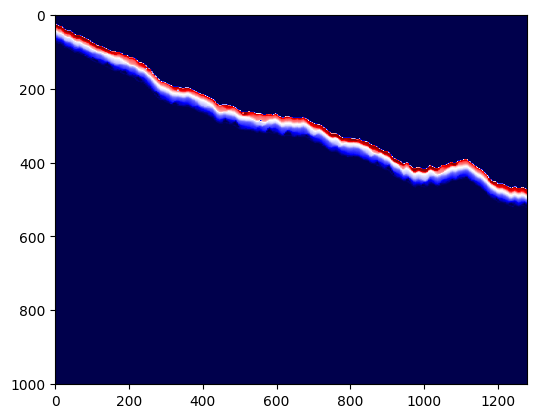

In [6]:
plt.imshow(rgt[400].T,cmap='seismic')

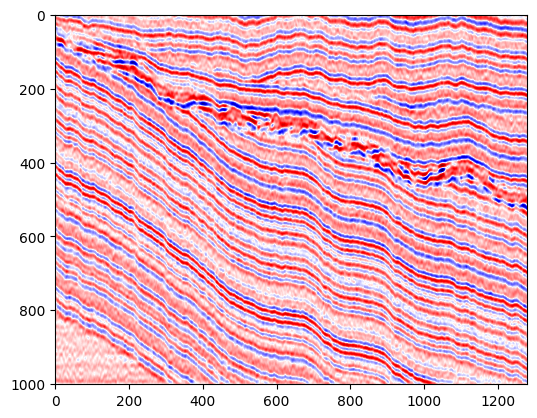

In [7]:
plt.imshow(sx[400].T,cmap='seismic')

In [8]:
# plt.imshow(rgt[400].T,cmap='seismic')
# hor_u = np.zeros((n3,n2))+1000
# hor_d = np.zeros((n3,n2))
# p = np.where(rgt!=0)
# for (i3,i2,i1) in zip(p[0],p[1],p[2]):
#     u = hor_u[i3,i2]
#     d = hor_d[i3,i2]
#     if i1 < u:
#         hor_u[i3,i2] = i1
#     if i1 > d:
#         hor_d[i3,i2] = i1
# hor_u[hor_u>999] = 0
# hor_u.astype(np.float32).tofile(path+'hor.dat')     

In [9]:
label.shape

(640, 1280, 1001)